# Final Project:

To run this project:
- `pipenv shell`
- `pipev install`
- `pipenv run jupyter notebook`

:thumbs-up:


#### Imports:

- All of these packages are installed via the `Pipfile.lock` file


In [197]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### Understanding the Data:

We're using the loan dataset

###### Goal: clean the data, and apply different classification algorithm on the data to determine if a loan case will be paid off or not

We will use the following:

- K-Nearest Neighbor
- Decision Tree
- Support Vector Machine
- Logistic Regression

Using the following:

- Jaccard index
- F1-score
- LogLoss

###### Categories:

- `loan_status`
    - Categorical variable
    - Either `PAIDOFF` or `COLLECTION`
- `Principal`
    - Numerical variable
    - The principal on the loan
- `terms` 
    - The length on the loan
- `effective_date`
    - The date the loan is effective
- `due_date`
    - Loan due date
- `age`
    - Age of the loan applicant
- `education`
    - Categorical variable
    - The education level of the loan applicant 
- `Gender`
    - Categorical Variable
    - The gender of the person


In [221]:
df = pd.read_csv("data/loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [222]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [223]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')

## KNN:

In [310]:
# Clean the dataset
X_knn = df[['Principal','terms','age']].values  #.astype(float)

In [311]:
y_knn = df['loan_status'].values

In [312]:
# Preprocessing and normalization
X_knn = preprocessing.StandardScaler().fit(X_knn).transform(X_knn.astype(float))

In [313]:
from sklearn.model_selection import train_test_split
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split( X_knn, y_knn, test_size=0.2, random_state=4)
print ('Train set:', X_knn_train.shape,  y_knn_train.shape)
print ('Test set:', X_knn_test.shape,  y_knn_test.shape)

Train set: (276, 3) (276,)
Test set: (70, 3) (70,)


In [314]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_vals = []
test_accuracy = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_knn_train,y_knn_train)
    y_knn_hat = knn.predict(X_knn_test)
    k_vals.append(k)
    test_accuracy.append(metrics.accuracy_score(y_knn_test, y_knn_hat))

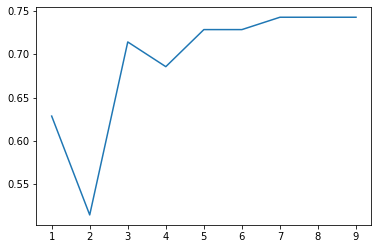

In [315]:
plt.plot(k_vals, test_accuracy)

In [316]:
knn_jaccard_score =  metrics.jaccard_score(y_knn_test, y_knn_hat, average='weighted')
knn_f1_score = metrics.f1_score(y_knn_test, y_knn_hat, average='weighted')
le_loan_status = preprocessing.LabelEncoder()
le_loan_status.fit(df.loan_status.unique())
y_knn_test = le_loan_status.transform(y_knn_test) 
y_knn_hat = le_loan_status.transform(y_knn_hat) 
knn_log_loss = metrics.f1_score(y_knn_test, y_knn_hat)

## Decision Tree:

##### Pre-processing:


In [303]:
from sklearn.tree import DecisionTreeClassifier

X_tree = df[["Principal", "terms", "effective_date", "due_date", "age", "education", "Gender"]].values

y_tree = df["loan_status"]

In [304]:
le_principal = preprocessing.LabelEncoder()
le_principal.fit(df.Principal.unique())
X_tree[:,0] = le_principal.transform(X_tree[:,0])

le_terms = preprocessing.LabelEncoder()
le_terms.fit(df.terms.unique())
X_tree[:,1] = le_terms.transform(X_tree[:,1])

le_effective_date = preprocessing.LabelEncoder()
le_effective_date.fit(df.effective_date.unique())
X_tree[:,2] = le_effective_date.transform(X_tree[:,2]) 

le_due_date = preprocessing.LabelEncoder()
le_due_date.fit(df.due_date.unique())
X_tree[:,3] = le_due_date.transform(X_tree[:,3]) 

le_education = preprocessing.LabelEncoder()
le_education.fit(df.education.unique())
X_tree[:,5] = le_education.transform(X_tree[:,5]) 

le_gender = preprocessing.LabelEncoder()
le_gender.fit(df.Gender.unique())
X_tree[:,6] = le_gender.transform(X_tree[:,6]) 

In [305]:
from sklearn.model_selection import train_test_split
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=4)
print ('Train set:', X_tree_train.shape,  y_tree_train.shape)
print ('Test set:', X_tree_test.shape,  y_tree_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


In [306]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree.fit(X_tree_train,y_tree_train)
y_tree_hat = tree.predict(X_tree_test)

In [307]:
from sklearn import metrics
import matplotlib.pyplot as plt
tree_jaccard_score = metrics.jaccard_score(y_tree_test, y_tree_hat, average='weighted')
tree_f1_score = metrics.f1_score(y_tree_test, y_tree_hat, average='weighted')
le_loan_status = preprocessing.LabelEncoder()
le_loan_status.fit(df.loan_status.unique())
y_tree_test = le_loan_status.transform(y_tree_test) 
y_tree_hat = le_loan_status.transform(y_tree_hat) 
tree_log_loss = metrics.log_loss(y_tree_test, y_tree_hat)

## Support Vector Machine

###### Pre-processing


In [279]:
df.dtypes

loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [280]:
X_svm = np.asarray(df[["Principal", "terms", "age"]])
y_svm = df[["loan_status"]]

le_loan_status = preprocessing.LabelEncoder()
le_loan_status.fit(df.loan_status.unique())
y_svm = le_loan_status.transform(y_svm) 

###### Train/Test

In [281]:
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split( X_svm, y_svm, test_size=0.2, random_state=4)
print ('Train set:', X_svm_train.shape,  y_svm_train.shape)
print ('Test set:', X_svm_test.shape,  y_svm_test.shape)


Train set: (276, 3) (276,)
Test set: (70, 3) (70,)


In [282]:
from sklearn import svm
loan_svm = svm.SVC(kernel='rbf')
loan_svm.fit(X_svm_train, y_svm_train)
y_svm_hat = loan_svm.predict(X_svm_test)

In [284]:
svm_jaccard_score = metrics.jaccard_score(y_svm_test, y_svm_hat)
svm_f1_score = metrics.f1_score(y_svm_test, y_svm_hat, average='weighted')
svm_log_loss = metrics.log_loss(y_svm_test, y_svm_hat)

## Logistic Regression

In [294]:
X_lr = np.asarray(df[["Principal", "terms", "age"]])
y_lr = df[["loan_status"]]

le_loan_status = preprocessing.LabelEncoder()
le_loan_status.fit(df.loan_status.unique())
y_lr = le_loan_status.transform(y_lr) 

/Users/taddbindas/.local/share/virtualenvs/Machine-Learning-With-Python-cHzp48gl/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [295]:
from sklearn.model_selection import train_test_split
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split( X_lr, y_lr, test_size=0.2, random_state=4)
print ('Train set:', X_lr_train.shape,  y_lr_train.shape)
print ('Test set:', X_lr_test.shape,  y_lr_test.shape)

Train set: (276, 3) (276,)
Test set: (70, 3) (70,)


In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_lr_train,y_lr_train)
y_lr_hat = LR.predict(X_lr_test)
y_lr_hat_prob = LR.predict_proba(X_lr_test)

In [297]:
lr_jaccard_score = metrics.jaccard_score(y_lr_test, y_lr_hat)
lr_f1_score = metrics.f1_score(y_lr_test, y_lr_hat, average='weighted')
lr_log_loss = metrics.log_loss(y_lr_test, y_lr_hat_prob)

# Conclusion

###### Below are the metrics for KNN:

In [317]:
print("KNN Jaccard Score: ", knn_jaccard_score)
print("KNN F1 Score: ", knn_f1_score)
print("KNN Log Loss: ", knn_log_loss)

KNN Jaccard Score:  0.5836734693877551
KNN F1 Score:  0.6697892271662764
KNN Log Loss:  0.8524590163934428


###### Below are the metrics for Decision Trees:

In [308]:
print("Decision Tree Jaccard Score: ", tree_jaccard_score)
print("Decision Tree F1 Score: ", tree_f1_score)
print("Decision Tree Log Loss: ", tree_log_loss)

Decision Tree Jaccard Score:  0.5192307692307693
Decision Tree F1 Score:  0.6598639455782312
Decision Tree Log Loss:  12.335391512100985


###### Below are the metrics for SVM:

In [300]:
print("SVM Jaccard Score: ", svm_jaccard_score)
print("SVM F1 Score: ", svm_f1_score)
print("SVM Log Loss: ", svm_log_loss)

SVM Jaccard Score:  0.7857142857142857
SVM F1 Score:  0.6914285714285714
SVM Log Loss:  7.401337712644475


###### Below are the metrics for Logistic Regression:

In [301]:
print("LR Jaccard Score: ", lr_jaccard_score)
print("LR F1 Score: ", lr_f1_score)
print("LR Log Loss: ", lr_log_loss)

LR Jaccard Score:  0.7857142857142857
LR F1 Score:  0.6914285714285714
LR Log Loss:  0.5568770466020386


- The best Jaccard Scores belong to SVM and Logistic Regression
- The best F1 Scores belong to KNN
- The best Log loss belongs to Logistic Regression